### BEOIC analysis of the isotope standards

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import norm
# matplotlib.use('TkAgg')  # Tkinter GUI, usually works on Wayland
import tabulate
plt.ion()



In [2]:
filepath="./summary_BEOIC_stds.xlsx"
df_beoic=pd.read_excel(filepath, sheet_name=None, header=0)

stds_summary={
    'AWI_LDC': {'d18_nom': -49.15, 'dD_nom': -383.67},
    'LSCE_VSAEL': {'d18_nom': -61.05, 'dD_nom': -475.04},
    'UIB': {'d18_nom': -41.83, 'dD_nom': -322.29},
    'VENICE_DC': {'d18_nom': -52.4, 'dD_nom': -407.13}}

print(df_beoic.keys())

for k in sorted(df_beoic.keys()):
    print(f"Standard: {k}")
    df_select=df_beoic[k][['d18_cal', 'dD_cal']]

    print(tabulate.tabulate(df_select.describe(percentiles=[0.95]), headers="keys", tablefmt="simple_grid"))
    stds_summary[k]["d18_cph"]=df_select['d18_cal'].mean()
    stds_summary[k]["dD_cph"]=df_select['dD_cal'].mean()
    stds_summary[k]["diff_dD"] = stds_summary[k]["dD_cph"]-stds_summary[k]["dD_nom"]
    stds_summary[k]["diff_d18"] = stds_summary[k]["d18_cph"]-stds_summary[k]["d18_nom"]



print(tabulate.tabulate(pd.DataFrame(stds_summary), headers='keys', tablefmt='simple_grid', floatfmt="0.3f"))
print(stds_summary)

dict_keys(['UIB', 'AWI_LDC', 'VENICE_DC', 'LSCE_VSAEL'])
Standard: AWI_LDC
┌───────┬─────────────┬─────────────┐
│       │     d18_cal │      dD_cal │
├───────┼─────────────┼─────────────┤
│ count │ 392         │  392        │
├───────┼─────────────┼─────────────┤
│ mean  │ -49.0571    │ -383.751    │
├───────┼─────────────┼─────────────┤
│ std   │   0.0644845 │    0.224219 │
├───────┼─────────────┼─────────────┤
│ min   │ -49.2812    │ -384.351    │
├───────┼─────────────┼─────────────┤
│ 50%   │ -49.0576    │ -383.72     │
├───────┼─────────────┼─────────────┤
│ 95%   │ -48.9538    │ -383.447    │
├───────┼─────────────┼─────────────┤
│ max   │ -48.882     │ -383.185    │
└───────┴─────────────┴─────────────┘
Standard: LSCE_VSAEL
┌───────┬───────────┬─────────────┐
│       │   d18_cal │      dD_cal │
├───────┼───────────┼─────────────┤
│ count │  72       │   72        │
├───────┼───────────┼─────────────┤
│ mean  │ -61.1583  │ -476.775    │
├───────┼───────────┼─────────────┤
│ std 

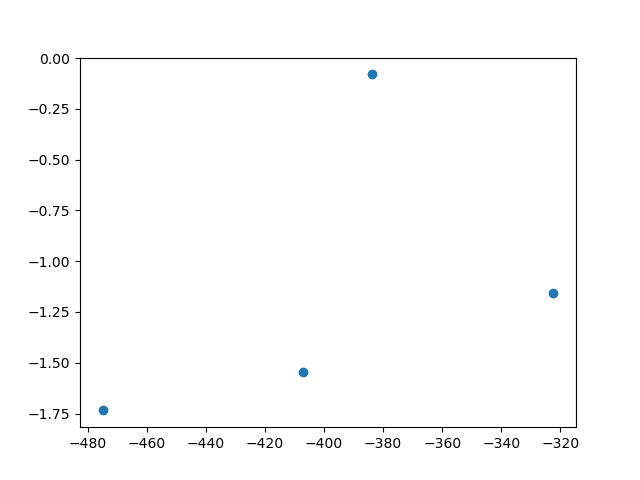

In [8]:
%matplotlib widget
plt.close("all")
# [v["dD_nom"] for v in stds_summary.values()]
x=[stds_summary[k]["dD_nom"] for k in stds_summary.keys()]
y=[stds_summary[k]["diff_dD"] for k in stds_summary.keys()]
x2=[8*stds_summary[k]["d18_nom"] for k in stds_summary.keys()]
y2=[8*stds_summary[k]["diff_d18"] for k in stds_summary.keys()]
[k for k in stds_summary.keys()]
plt.plot(x, y, "o")
# plt.plot(x2, y2, "o", color = "b")
plt.show()